# APIs

Retrieve CyGNSS and ERA5 data using APIs

In [1]:
import os

## CyGNSS

Using the tools in https://github.com/nasa/podaacpy. Citation key: https://doi.org/10.5281/zenodo.1751972



https://github.com/nasa/podaacpy/blob/main/examples/Using%20Podaacpy%20to%20retrieve%20CYGNSS%20Level%202%20Science%20Data.ipynb'


This is the dataset we need to retrieve:

https://podaac.jpl.nasa.gov/dataset/CYGNSS_L1_V3.0

Old Shorthand: `PODAAC-CYGNS-L1X30`

Newer processed version available: `CYGNSS_L1_V3.1`


With files following the format

> cyg01.ddmi.s20210108-000000-e20210108-235959.l1.power-brcs.a30.d31.nc


### PODAAC

> Outdated, use EarthCloud

### EarthCloud

https://github.com/podaac/data-subscriber

Follow the directions in `podaac_access.py` to generate a `~/.netrc` with the login credentials.

In [2]:
import sys
sys.path.append('/work/ka1176/caroline/gitlab/data-subscriber/subscriber')

In [3]:
os.chdir('/work/ka1176/caroline/gitlab/data-subscriber/subscriber/')
os.listdir()

['podaac_data_subscriber.py',
 '__init__.py',
 '__pycache__',
 'podaac_data_downloader.py',
 'downloads',
 'downloads2',
 'podaac_access.py']

Example command to download data

`python podaac_data_downloader.py  -c CYGNSS_L1_V3.1 -d ./downloads --start-date 2021-01-14T00:00:00Z --end-date 2021-01-15T01:00:00Z`

It will automatically skip files that were already downloaded. Download times may vary, on an interactive node one full day of data took 

> Time to complete download: 8 min 30 s
> File size: 7.8 GB

In [4]:
import time
t0 = time.time()

%env PYTHONPATH=/work/ka1176/caroline/gitlab/data-subscriber
!python podaac_data_downloader.py  -c CYGNSS_L1_V3.1 -d ./downloads2 --start-date 2022-05-06T00:00:00Z --end-date 2022-05-07T00:00:00Z

!du -h ./downloads2
t1 = time.time()
print(t1-t0)

env: PYTHONPATH=/work/ka1176/caroline/gitlab/data-subscriber
[2022-08-18 17:51:15,812] {podaac_data_downloader.py:242} INFO - Found 8 total files to download
[2022-08-18 17:51:18,056] {podaac_data_downloader.py:267} INFO - 2022-08-18 17:51:18.056891 SKIPPED: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/CYGNSS_L1_V3.1/cyg07.ddmi.s20220506-000000-e20220506-235959.l1.power-brcs.a31.d32.nc
[2022-08-18 17:51:19,978] {podaac_data_downloader.py:267} INFO - 2022-08-18 17:51:19.978169 SKIPPED: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/CYGNSS_L1_V3.1/cyg02.ddmi.s20220506-000000-e20220506-235959.l1.power-brcs.a31.d32.nc
[2022-08-18 17:51:21,687] {podaac_data_downloader.py:267} INFO - 2022-08-18 17:51:21.687522 SKIPPED: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/CYGNSS_L1_V3.1/cyg06.ddmi.s20220506-000000-e20220506-235959.l1.power-brcs.a31.d32.nc
[2022-08-18 17:51:23,400] {podaac_data_downloader.py:267} INFO - 2022-0

Example command to subscribe to data

`python podaac_data_subscriber.py  -c CYGNSS_L1_V3.1 -d ./downloads --minutes 460`

In [5]:
%env PYTHONPATH=/work/ka1176/caroline/gitlab/data-subscriber
!python podaac_data_subscriber.py  -c CYGNSS_L1_V3.1 -d ./downloads --minutes 3600

env: PYTHONPATH=/work/ka1176/caroline/gitlab/data-subscriber
[2022-08-18 17:51:32,579] {podaac_data_subscriber.py:174} INFO - NOTE: Update found in the data directory. (The last run was at 2022-08-18T14:57:59Z.)
[2022-08-18 17:51:33,105] {podaac_data_subscriber.py:270} INFO - Found 2 total files to download
[2022-08-18 17:52:30,905] {podaac_data_subscriber.py:299} INFO - 2022-08-18 17:52:30.905603 SUCCESS: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/CYGNSS_L1_V3.1/cyg08.ddmi.s20220816-000000-e20220816-235959.l1.power-brcs.a31.d32.nc
[2022-08-18 17:53:15,932] {podaac_data_subscriber.py:299} INFO - 2022-08-18 17:53:15.932443 SUCCESS: https://archive.podaac.earthdata.nasa.gov/podaac-ops-cumulus-protected/CYGNSS_L1_V3.1/cyg05.ddmi.s20220816-000000-e20220816-235959.l1.power-brcs.a31.d32.nc
[2022-08-18 17:53:15,934] {podaac_data_subscriber.py:314} INFO - Downloaded Files: 2
[2022-08-18 17:53:15,934] {podaac_data_subscriber.py:315} INFO - Failed Files:     0
[2022-0

## ERA5

https://github.com/ecmwf/cdsapi

In [6]:
!cat ~/.cdsapirc

url: https://cds.climate.copernicus.eu/api/v2
key: 149613:37ca75c8-6d1f-476a-a97f-45dbd797bfeb
verify: 0


In [7]:
import cdsapi
import xarray as xr
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from global_land_mask import globe

import pandas as pd

In [8]:
%matplotlib inline

In [9]:
cds = cdsapi.Client()

Use the website to generate templates for API requests

In [10]:
cds.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'format': 'netcdf',
        'variable': [
            '10m_u_component_of_wind', '10m_v_component_of_wind',
        ],
        'year': '2022',
        'month': '08',
        'day': '02',
        'time': [
            '00:00', '01:00', '02:00',
            '03:00', '04:00', '05:00',
            '06:00', '07:00', '08:00',
            '09:00', '10:00', '11:00',
            '12:00', '13:00', '14:00',
            '15:00', '16:00', '17:00',
            '18:00', '19:00', '20:00',
            '21:00', '22:00', '23:00'
        ],
        'area': [
            40, -180, -40, 180,
        ],
    },
    'download.nc')

/home/k/k202141/.conda/envs/iconml/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2022-08-18 17:53:22,526 INFO Welcome to the CDS
2022-08-18 17:53:22,526 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
/home/k/k202141/.conda/envs/iconml/lib/python3.9/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cds.climate.copernicus.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
2022-08-18 17:53:22,696 INFO Request is completed
2022-08-18 17:53:22,696 INFO Downloading https://download-0014-clone.copernicus-clima

Result(content_length=44383516,content_type=application/x-netcdf,location=https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data1/adaptor.mars.internal-1660728709.359887-11860-2-6b5771cc-8a22-4160-ae6b-8b988de2a294.nc)

In [11]:
ds_era5 = xr.open_dataset('download.nc')
ds_era5.close()

Calculate the 10m windspeed labels as $y_\mathrm{true} = \sqrt{ u_\mathrm{10m}^2 + v_\mathrm{10m}^2 }$ using `xarray` lazy computation

In [12]:
ds_era5['ERA5_windspeed'] = np.sqrt( ds_era5['u10'] * ds_era5['u10'] + ds_era5['v10'] * ds_era5['v10'] )

Use the global land mask to filter for observations over the oceans

In [13]:
lats = ds_era5['latitude'].values
lons = ds_era5['longitude'].values

times = ds_era5['time'].values

print('Total number of grid points:', len(lons) * len(lats))

Total number of grid points: 462240


In [14]:
mesh_lats, mesh_lons = np.meshgrid(lats, lons)

print(len(mesh_lats.flatten()))

462240


In [15]:
globe_ocean_mask = globe.is_ocean(mesh_lats, mesh_lons)
globe_land_mask = ~globe_ocean_mask

print('Fraction of ocean grid points:', globe_ocean_mask.sum() / len(globe_ocean_mask.flatten()))

Fraction of ocean grid points: 0.7372966424368294


In [16]:
ds_era5

<xarray.Dataset>
Dimensions:         (longitude: 1440, latitude: 321, time: 24)
Coordinates:
  * longitude       (longitude) float32 -180.0 -179.8 -179.5 ... 179.5 179.8
  * latitude        (latitude) float32 40.0 39.75 39.5 ... -39.5 -39.75 -40.0
  * time            (time) datetime64[ns] 2022-08-02 ... 2022-08-02T23:00:00
Data variables:
    u10             (time, latitude, longitude) float32 ...
    v10             (time, latitude, longitude) float32 ...
    ERA5_windspeed  (time, latitude, longitude) float32 6.918 6.446 ... 10.23
Attributes:
    Conventions:  CF-1.6
    history:      2022-08-17 09:31:49 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [17]:
y_true = ds_era5['ERA5_windspeed'].values

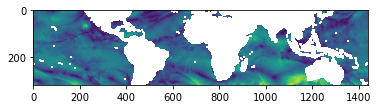

In [18]:
y_ocean = np.copy(y_true[0])
y_ocean[globe_land_mask.T] = None
plt.imshow(y_ocean)

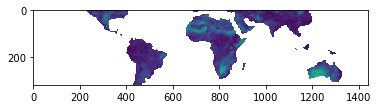

In [19]:
y_land = np.copy(y_true[0])
y_land[globe_ocean_mask.T] = None
plt.imshow(y_land)

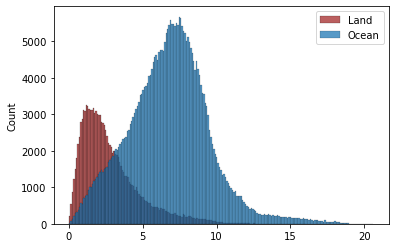

In [20]:
y_bins = np.arange(0, 20, 0.25)

sns.histplot(y_land.flatten(), label='Land', color='brown')
sns.histplot(y_ocean.flatten(), label='Ocean', color='C0')
plt.legend()
plt.show()

In [21]:
df = pd.DataFrame()

In [22]:
df['windspeed'] = y_true[0].flatten()
df['is_ocean']  = globe_ocean_mask.T.flatten()

In [23]:
print('Mean windspeed (m/s)')
df.groupby('is_ocean')['windspeed'].mean()

Mean windspeed (m/s)


is_ocean
False    2.808173
True     6.818164
Name: windspeed, dtype: float32

In [24]:
print('Stddev windspeed (m/s)')
df.groupby('is_ocean')['windspeed'].std()

Stddev windspeed (m/s)


is_ocean
False    1.995847
True     2.759875
Name: windspeed, dtype: float64

Interpolate the ERA5 wind speed in space and time to match the CyGNSS DDM coordinates. For example to pick the nearest neighbor value a simple `argmin` is sufficient.

In [25]:
cygnss_lat = 23.76
cygnss_lon = 140.0
cygnss_time = np.datetime64('2022-08-02T06:12:47.0') # 06:12:47

In [26]:
globe.is_ocean(cygnss_lat, cygnss_lon)

True

In [27]:
ix_lats = np.argmin(np.abs(cygnss_lat - lats))
ix_lons = np.argmin(np.abs(cygnss_lon - lons))
ix_time = np.argmin(np.abs(cygnss_time - times))

In [28]:
y_nn = y_true[ix_time, ix_lats, ix_lons]

In [29]:
y_nn

1.736329

More sophisticated using interpolation

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.LSQSphereBivariateSpline.html#scipy.interpolate.LSQSphereBivariateSpline

In [30]:
import scipy

In [31]:
from scipy.interpolate import interp2d

In [32]:
f_interp = interp2d(lats, lons, y_true[6].T)

In [33]:
f_interp(cygnss_lat, cygnss_lon)

array([1.7523313])